## Import Modules

In [1]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

## Afficher les 3 dataframes correspondant aux demandes:

### Stars by_birthdate

In [2]:
# Ask the user which year of birth he/she wants to display the actors born in this year
year = int(input('Année de naissance des stars que vous voulez afficher: '))
# Read JSON
dfStarsByBirthYear = pd.read_json(f'http://localhost:8000/stars/by_birthyear/{year}')
# Here, we adapt our data by passing through a lambda which is used to make a function at the time of an englobing call.
# Thus, we can "type" our birthdate column in date and manage our 'None' values.
dfStarsByBirthYear.birthdate = dfStarsByBirthYear.birthdate.apply(lambda bd:date.fromisoformat(bd) if bd is not None else None)
# Indexing with the id read in the JSON
dfStarsByBirthYear.set_index('id', inplace=True)
# Display all the stars born this year
dfStarsByBirthYear

Année de naissance des stars que vous voulez afficher: 1998


,name,birthdate
id,,
1556364,Anthony De Marco,1998-01-01
2474692,Conor Carroll,1998-01-01
2973456,Jake Siciliano,1998-01-01
1,Johanna Teyssier,1998-10-02
9112634,Josiah Sheffie,1998-01-01
3151467,Lauren Ingmire,1998-01-01
1638321,Maya Hawke,1998-01-01
11749103,Mehdi Teyssier,1998-10-01
5693256,Tallia Storm,1998-01-01


### Movies by_title

In [6]:
# Ask the user which title of movie he/she wants to display
title = input('Which movie do you want ?: ').split()
# Manage spaces for the URL
s = '%20'
s = s.join(title)
# Read JSON
dfMoviesByTitle = pd.read_json(f'http://localhost:8000/movies/by_parttitle?n={s}')
# Indexing with the id read in the JSON
dfMoviesByTitle.set_index('id', inplace=True)
# Display all the movies with this title or part of title
dfMoviesByTitle

Which movie do you want ?: Circle


,title,year,duration
id,,,
4287320,The Circle,2017,110


### Stats by_actor

In [7]:
# Set min_count
minc = 10
# Read JSON
dfStatsMovieByActor = pd.read_json(f'http://localhost:8000/stars/stats_movie_by_actor?minc={minc}')
# Display statistics by actor
dfStatsMovieByActor

,star,movie_count,first_movie_date,last_movie_date
0,John Wayne,172,1926,1976
1,Harrison Ford,84,1917,1932
2,Sean Connery,73,1954,2012
3,Sylvester Stallone,73,1969,2019
4,Tom Hanks,69,1980,2020
...,...,...,...,...
161,Patrick Wayne,10,1950,1971
162,Frank Welker,10,1981,2019
163,Grant Withers,10,1943,1955
164,Michael Fassbender,10,2001,2017


## Afficher les figures:

### Répartition par année des films et naissances de stars:

In [8]:
# Parameters
skip = 0
limit = 10000

In [9]:
# Read JSON
dfMovies = pd.read_json(f'http://localhost:8000/movies?skip={skip}&limit={limit}')
# Keep only two columns: 'year' and 'title'
dfMovies = dfMovies[['year','title']]
# Count movies grouping by 'year'
dfMoviesByYear = dfMovies.groupby(by='year').count()
# Rename column 'title' by 'count_movies'
dfMoviesByYear.columns = pd.Index(['count_movies'], dtype='object')

In [10]:
# Read JSON
dfStars = pd.read_json(f'http://localhost:8000/stars/?skip={skip}&limit={limit}')
# Str to Datetime
dfStars.birthdate = dfStars.birthdate.apply(lambda bd:date.fromisoformat(bd) if bd is not None else None)
# Delete 'None' values
dfStars = dfStars[~dfStars['birthdate'].isna()]
# Add a column 'birthyear'
dfStars['birthyear'] = pd.to_datetime(dfStars['birthdate']).dt.year
# Keeping only the two columns 'name' & 'birthyear'
dfStarsByYear = dfStars[['name','birthyear']]
# Count stars grouping by 'birthyear'
dfStarsByYear = dfStarsByYear.groupby(by='birthyear').count()
# Rename column 'name' by 'count_stars'
dfStarsByYear.columns = pd.Index(['count_stars'], dtype='object')

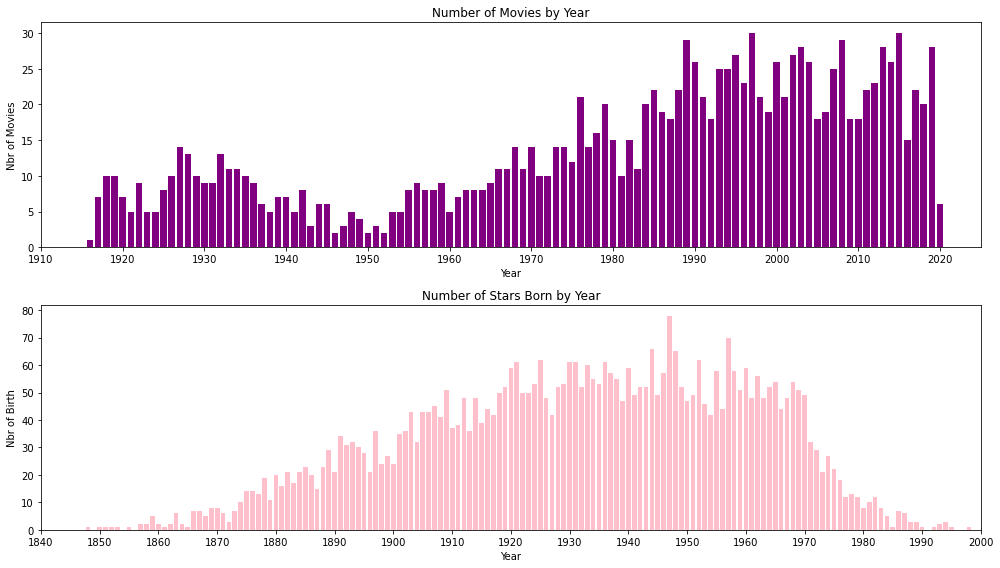

In [11]:
# fig: the whole pattern
# ax1, ax2: 2 layouts
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,8)) # 2 graphs (2 rows, 1 column)

# Plot 1 on ax1
ax1.bar(dfMoviesByYear.index, dfMoviesByYear.count_movies, color='purple')
ax1.set_xlabel('Year')
ax1.set_ylabel('Nbr of Movies')
ax1.set_title('Number of Movies by Year')
ax1.set_xlim(1910,2025)
# Major graduation on the x axis
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
# Minor graduation on the x axis
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(20))

# Plot 2 on ax2
ax2.bar(dfStarsByYear.index, dfStarsByYear.count_stars, color='pink')
ax2.set_xlabel('Year')
ax2.set_ylabel('Nbr of Birth')
ax2.set_title("Number of Stars Born by Year")
ax2.set_xlim(1840,2000)
# Major graduation on the x axis
ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))
# Minor graduation on the x axis
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(20))

fig.tight_layout()

### Diagramme barres sur la carrière du top 10 acteurs (1 graphe nombre, 1 graphe années min/max):

In [12]:
# Sorting values by the number of movies and get the Top10 Actors
Top10 = dfStatsMovieByActor.sort_values(['movie_count'], ascending=False).head(10)
Top10 = Top10.set_index('star')

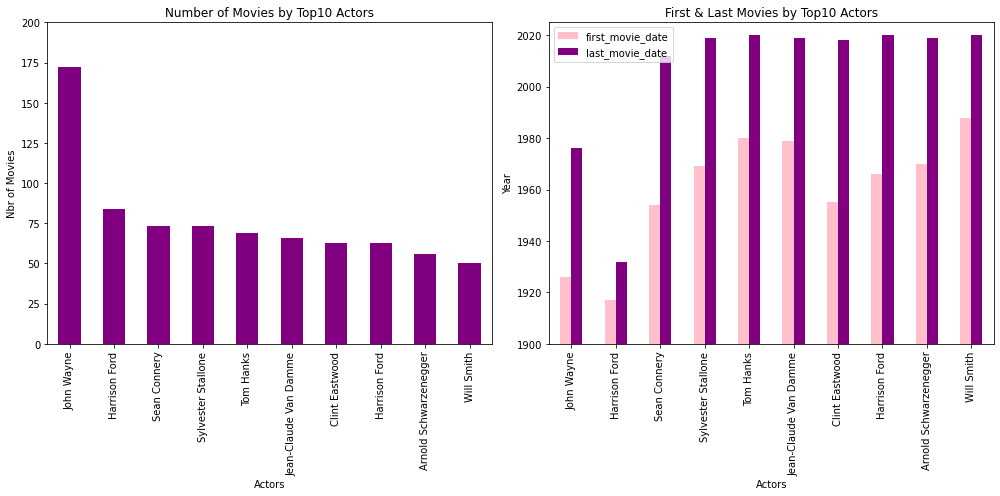

In [13]:
# fig: the whole pattern
# ax1, ax2: 2 layouts
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,7)) # 2 graphs (2 rows, 1 column)

# Plot 1 on ax1
Top10.movie_count.plot(kind='bar', ax=ax1, color='purple')
ax1.set_xlabel('Actors')
ax1.set_ylabel('Nbr of Movies')
ax1.set_title('Number of Movies by Top10 Actors')
ax1.set_ylim(0,200)

# Plot 2 on ax2
Top10.plot(y=['first_movie_date', 'last_movie_date'], kind='bar', ax=ax2, color=['pink', 'purple'])
ax2.set_xlabel('Actors')
ax2.set_ylabel('Year')
ax2.set_title("First & Last Movies by Top10 Actors")
ax2.set_ylim(1900,2025)

fig.tight_layout()